# 第5课：简要回顾辐射

## 1. 逃逸温度和递减率

行星能量平衡是所有气候模拟的基础。因此我们通过全球收支平均来表述这个平衡

\begin{equation*}
C\frac{dT_{s}}{dt} = (1-\alpha)Q-OLR
\end{equation*}

根据逃逸温度$T_{e}$OLR定义写为

\begin{equation*}
OLR = \sigma T_{e}^{4}
\end{equation*}

采用来自观测的行星能量收支的值，我们有$T_{e}=255K$

因此行星逃逸温度约为33K，比平均表面温度（288K）要冷。

**在大气哪我们发现$T=T_{e}=255k$**

让我们从NCEP再分析资料画出大气温度。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = nc.Dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc" )
level = ncep_air.variables['level'][:]
lat = ncep_air.variables['lat'][:]
zstar = np.log(level/1000)

In [2]:
Tzon = np.mean(ncep_air.variables['air'][:],axis=(0,3))
Tglobal = np.average( Tzon , weights=np.cos(np.deg2rad(lat)), axis=1)

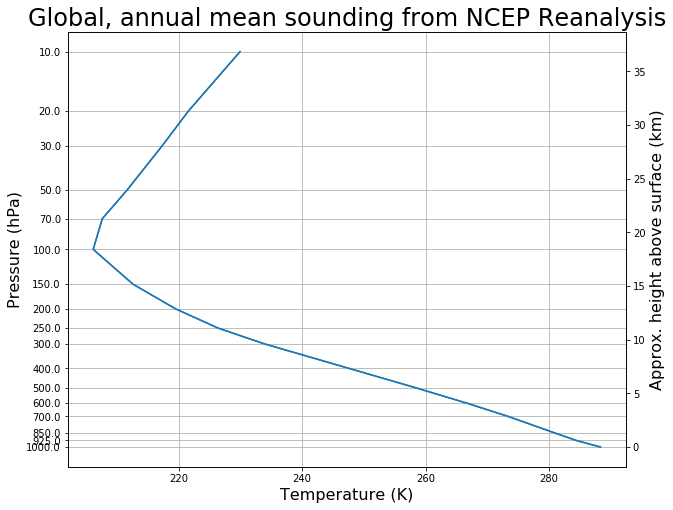

In [3]:
fig = plt.figure( figsize=(10,8) )
ax = fig.add_subplot(111)
ax.plot( Tglobal + 273.15, zstar )
ax.invert_yaxis()
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('Pressure (hPa)', fontsize=16 )
ax.set_yticks( zstar )
ax.set_yticklabels( level )
ax.set_title('Global, annual mean sounding from NCEP Reanalysis', fontsize = 24)
ax2 = ax.twinx()
ax2.plot( Tglobal + 273.15, -8*zstar );
ax2.set_ylabel('Approx. height above surface (km)', fontsize=16 );
ax.grid()

请注意，我们一直在说全球平均表面温度大约是288 K。

那么我们在哪里发现温度$T_{e}=255K$？

实际上在对流层中部，接近500 hPa或高度约5 km。

我们可以推断出，大部分传出的长波辐射实际上都是源自地表以上的。

回想一下，我们观察到的全球能源预算图显示，大气层和云层排放的总OLR约为$239W m^{-2}$中的217个，直接来自地表的只有$22W m^{-2}$。

这是由于**温室效应**。到目前为止，我们只是假设线性关系，在我们的能量平衡模型中以非常人为的方式处理了温室效应
\begin{equation*}
T_{e}=\beta T_{s}
\end{equation*}
 
这相当于假定OLR从地球表面温度下作为黑体发射出来的数值减少了一个常数因子。

现在是时候开始思考如何在大气中实际发生辐射传输过程，以及如何对其进行模拟。

## 2. 太阳辐射

考察太阳辐射谱。

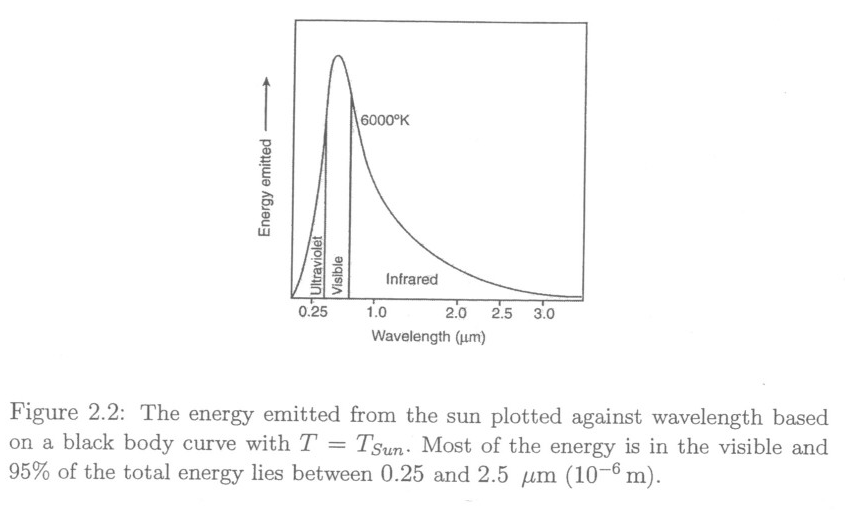

In [6]:
from IPython.display import Image
Image('./image/MarshallPlumbFig2.2.png')

图为Marshall and Plumb（2008）：大气，海洋和气候动力学

- 在可见光范围内的光谱峰
- 这些波长的能量最多。
- 没有巧合，我们的眼睛对这个波长范围敏感！
- 称为“红外”的较长波长，称为“紫外”的较短波长。

光谱的形状是辐射排放的一个基本特征（想想火灾中的煤炭的颜色 - 冷却器=红色，较热=白色）

理论和实验告诉我们，发射辐射的总通量和最大发射波长只取决于光源的温度！

理论光谱是由Max Planck计算出来的，因此被称为“Planck”光谱（或简称为黑体光谱）。

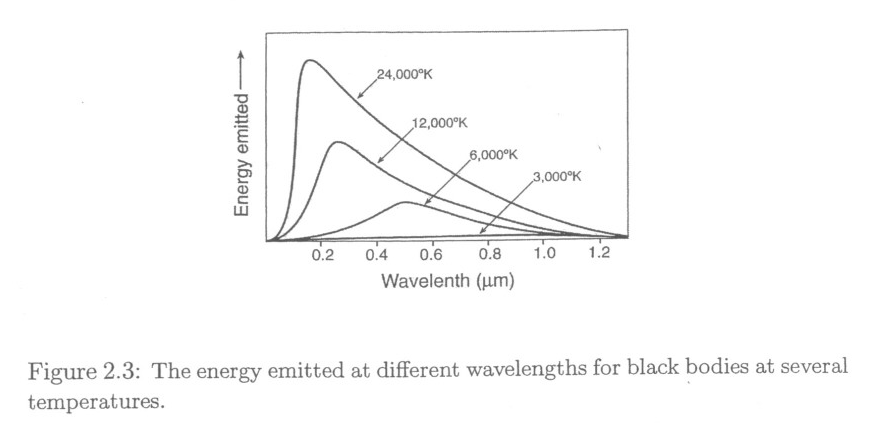

In [7]:
Image('./image/MarshallPlumbFig2.3.png')

图为Marshall and Plumb（2008）：大气，海洋和气候动力学

从冷到暖：

- 总排放量增加
- 最大逃逸发生在波长较短。

**这些曲线在所有波长上的积分**给我们我们熟悉的$\sigma T^{4}$

还表明我们可以通过峰追溯一个不错的曲线...

数学结果是这样的
\begin{equation*}
\lambda_{max}T = constant
\end{equation*}
 
（被称为维恩位移定律）。

通过将观测到的太阳辐射拟合成黑体曲线，我们可以推断太阳的辐射温度约为6000 K。

知道这一点，并知道太阳光谱峰值在0.6微米，我们可以计算出最大地面辐射波长
\begin{equation*}
\lambda_{max}^{Earth}=0.6\mu m\frac{6000}{255}=14\mu m
\end{equation*}
 
这是在光谱的远红外部分。

## 3. 地面辐射和吸收光谱

现在让我们看看太阳和地球的归一化黑体曲线：

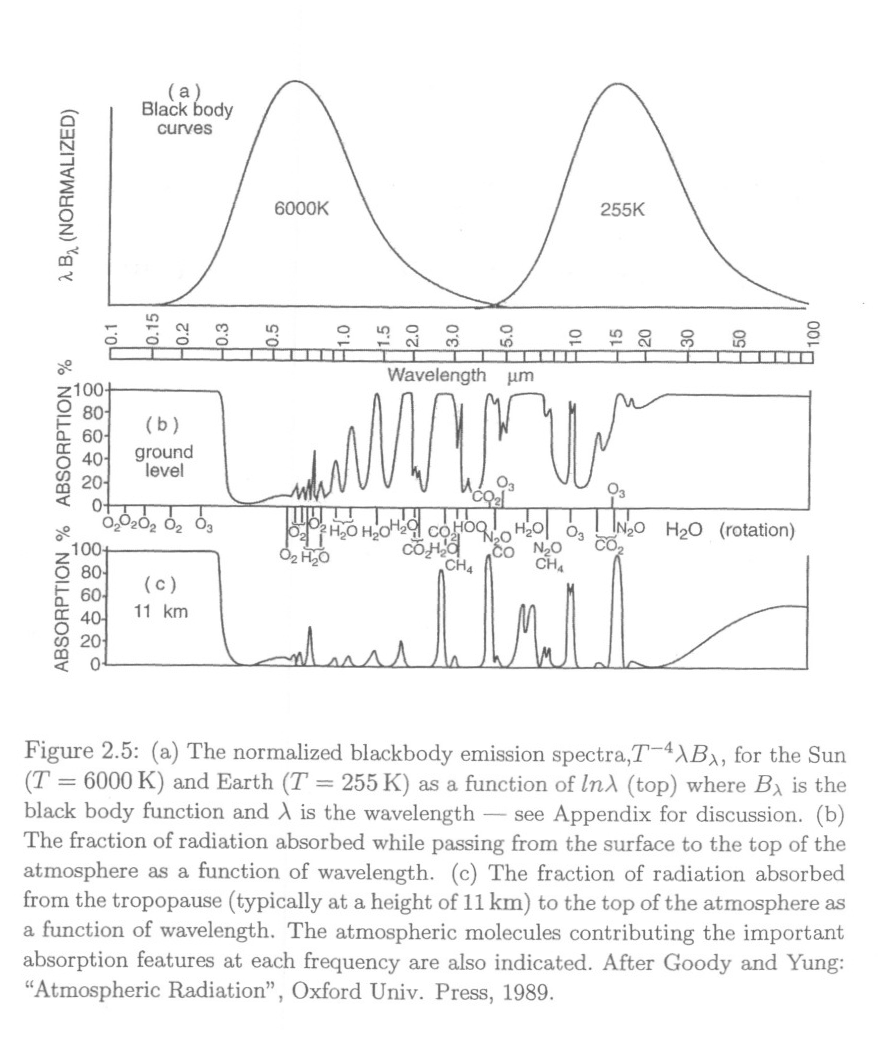

In [8]:
Image('./image/MarshallPlumbFig2.5.png')

图为Marshall and Plumb（2008）：大气，海洋和气候动力学

两个光谱之间基本上没有重叠。

**这是我们可以将太阳“短波”和陆地“长波”辐射作为两个截然不同的现象来讨论的根本原因。**

实际上，所有辐射都存在于不同波长的连续谱上。但是在气候科学方面，我们可以通过一个非常简单的“双流”近似（短波和长波）来思考。到目前为止，我们已经完成了这个过程！

现在看大气吸收光谱。 （在通过大气的单个垂直路径上吸收的每个波长处的辐射分数）

- 大气在可见光范围内几乎是完全透明的，就在太阳光谱的顶峰
- 紫外线中的气氛非常不透明
- 红外光谱的不透明度变化很大！
- 看看与各种吸收功能相关的气体：
- 主要参与者包括$H_{2}O$，$CO_{2}$，$N_{2}O$，$O_{2}$。
- 与大气的主要成分相比，按降序排列：
    - 78％$N_{2}$
    - 21％$O_{2}$
    - 1％Ar
    - $H_{2}O$（可变）
- 主要成分气体N 22和O 22在整个光谱中几乎是完全透明的（在远UV下有O 22吸收特征，但在这些波长处有少量能量）。
- 温室效应主要涉及微量成分：
    - O3 = 500 ppb
    - N2O = 310ppb
    - CO2 = 400 ppm（但是迅速增加！）
    - CH4 = 1.7ppm
- 请注意，其中大部分是三原子分子！这是有根本原因的：这些分子具有旋转和振动的模式，很容易在红外波长激发。参见辐射传输课程！